### Esse programa análisa a predição de ações, utilizando o método Long Short Term Memory (LSTM) da Recurrent Neural Network (RNN).

In [0]:
#Importação de Pacotes
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [0]:
#Parametros iniciais
N = 60 #[Número de dados históricos]
txLearning = .8 #[Taxa de aprendizado]

In [0]:
#Obtem os dados históricos
df = web.DataReader('VALE3.SA', data_source='yahoo', start='2012-01-01', end='2020-04-17') 

#Apresenta alguns valores
df

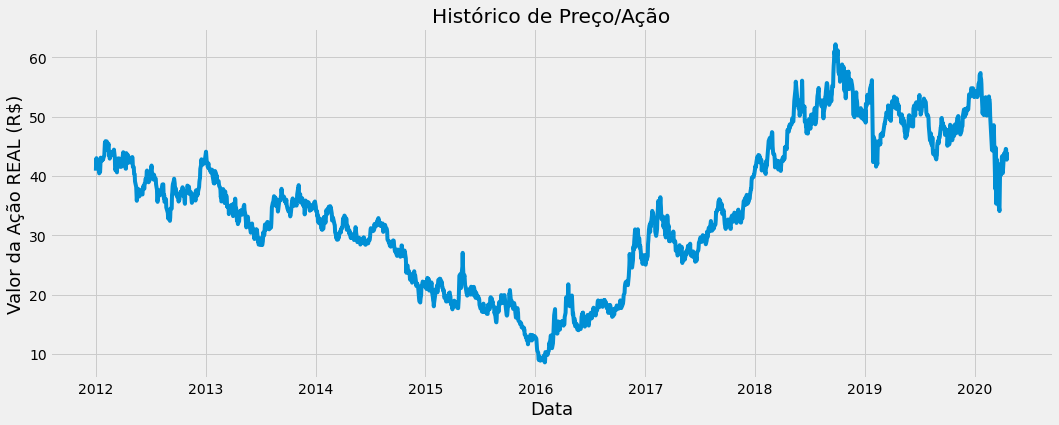

In [195]:
#Visualização histórica de preços de fechamento da ação
plt.figure(figsize=(16,6))
plt.title('Histórico de Preço/Ação')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Valor da Ação REAL (R$)',fontsize=18)
plt.show()

In [0]:
#Cria um DataFrame somente com os valores de fechamento da ação
acoes = df.filter(['Close'])

#Converte para numpy 
dataset = acoes.values

#Obtem a quantidade de padrões para treinamento 
NN = math.ceil( len(dataset) * txLearning) 

In [0]:
#Faz uma normalização dos dados entre 0 a 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 

scaled_data = scaler.fit_transform(dataset)

In [0]:
#Cria o conjunto de treinamento 
train_data = scaled_data[0:NN  , : ]

x_train=[]
y_train = []

for i in range(N,len(train_data)):
    x_train.append(train_data[i-N:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Converte para matrizes numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Faz uma adaptação para utilização em LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Cria o modelo de rede LSTM
modelo = Sequential()
modelo.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
modelo.add(LSTM(units=50, return_sequences=False))
modelo.add(Dense(units=25))
modelo.add(Dense(units=1))

In [0]:
#Compila o modelo
modelo.compile(optimizer='adam', loss='mean_squared_error')

In [203]:
#Treina o modelo
modelo.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1584/1584 [==============================] - 62s 39ms/step - loss: 0.0016


In [0]:
#Testa o dataset
test_data = scaled_data[NN - N: , : ]
#Cria o conjunto de x_test e y_test
x_test = []
y_test =  dataset[NN : , : ]
for i in range(N,len(test_data)):
    x_test.append(test_data[i-N:i,0])

In [0]:
#Converte x_test para numpy
x_test = np.array(x_test)

In [0]:
#Faz uma adaptação para utilização em LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Prediz os valores de preço da ação
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [208]:
#Calculata o RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.9547641033973913

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


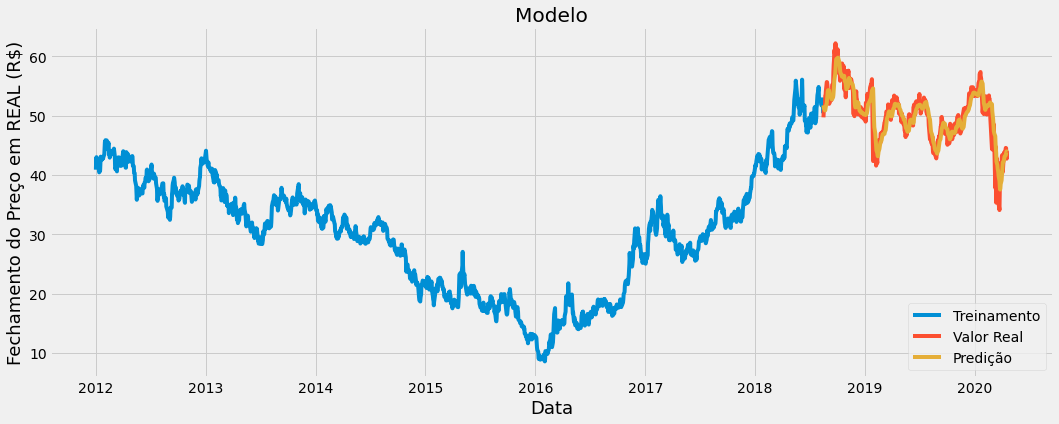

In [209]:
#apresenta as visualizações para análise
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Modelo')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Fechamento do Preço em REAL (R$)', fontsize=18)
plt.plot(subplots=True, figsize=(16,6))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Treinamento', 'Valor Real', 'Predição'], loc='lower right')
plt.show()

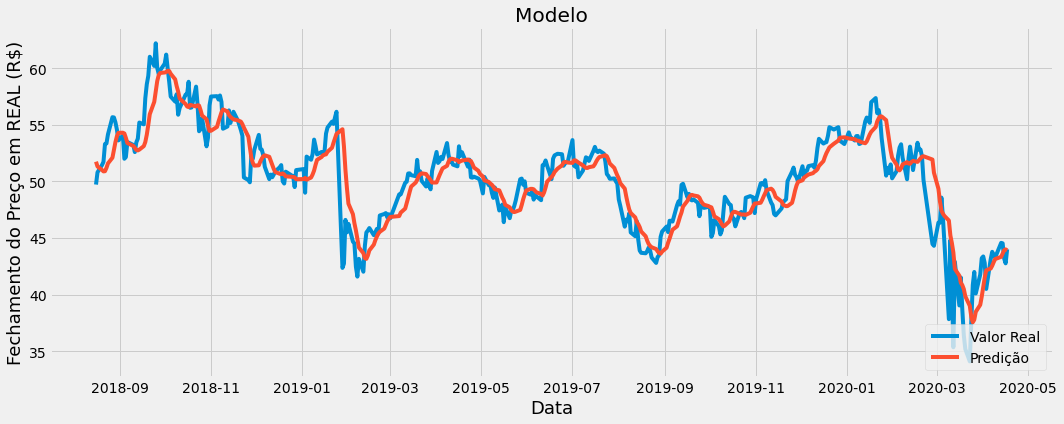

In [210]:
#Visualização de dados
plt.figure(figsize=(16,6))
plt.title('Modelo')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Fechamento do Preço em REAL (R$)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Valor Real', 'Predição'], loc='lower right')
plt.show()

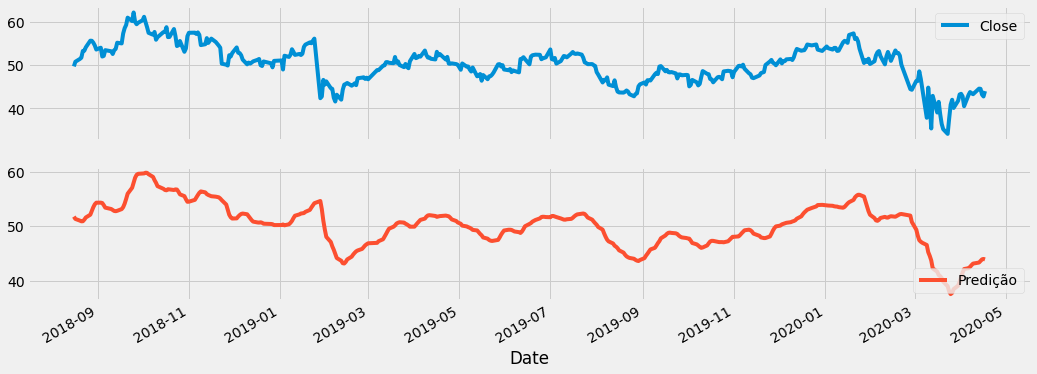

In [211]:
valid[['Close', 'Predictions']].plot(subplots=True, figsize=(16,6))
plt.legend(['Predição'], loc='lower right')
plt.show()

In [212]:
valid[['Close', 'Predictions']].corr()

,Close,Predictions
Close,1.00000,0.90337
Predictions,0.90337,1.00000
